*Import Required library*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Clean the data*

In [3]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
Corr_mat=df.corr()
Corr_mat["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [135]:
#col=[]
X=df[["Glucose"]]
X.shape

(768, 1)

In [136]:
y=df[["Outcome"]].values
y.shape

(768, 1)

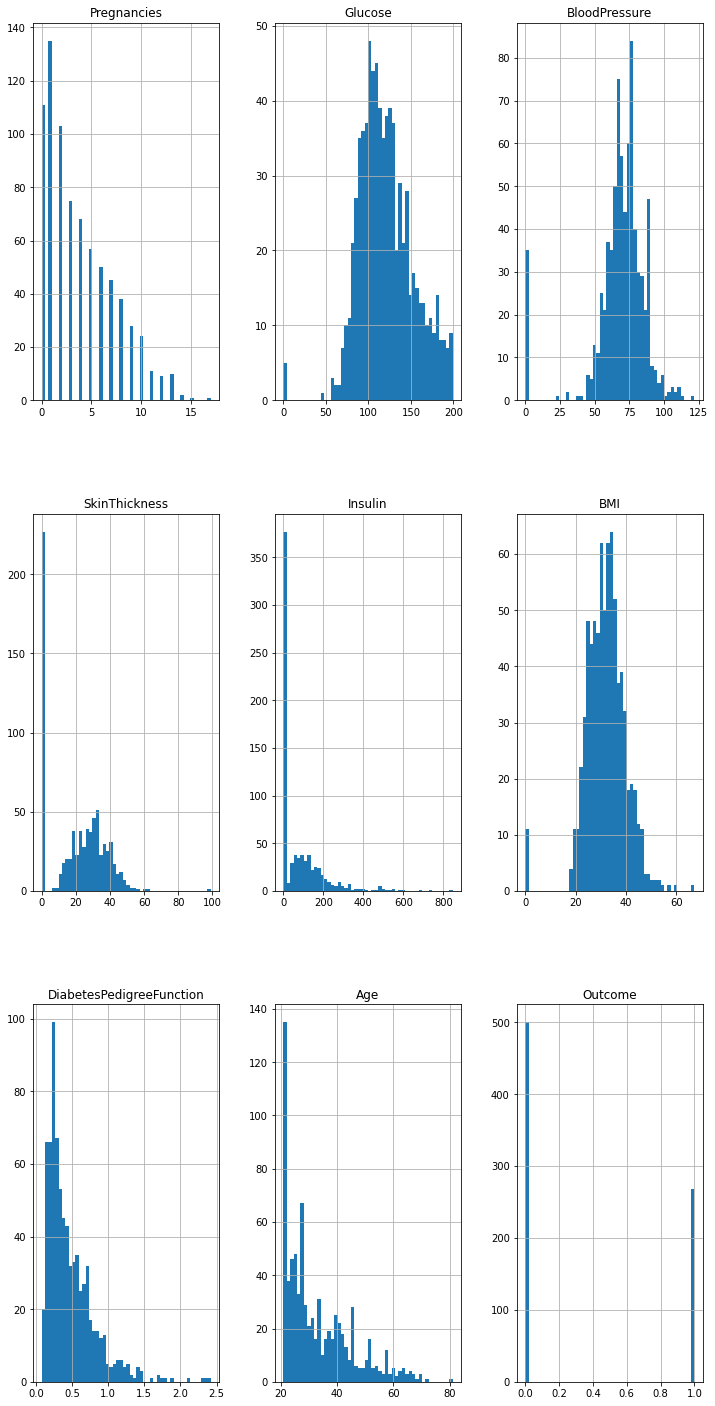

In [137]:
df.hist(bins=50, figsize=(12,25))
plt.show()

Rescale the data

In [138]:
from sklearn.preprocessing import StandardScaler
encoder=StandardScaler()
X_encode= encoder.fit_transform(X)

Train, test and split the data to create ML model

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_encode, y, test_size=0.33)

**Logistic Regression**

In [140]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

Fit the model

In [141]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [142]:
y_pred=model.predict(X_test)

*Performance Parameter*

```
# This is formatted as code
```



In [143]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.7204724409448819


In [144]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[135  48]
 [ 23  48]]


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       183
           1       0.50      0.68      0.57        71

    accuracy                           0.72       254
   macro avg       0.68      0.71      0.68       254
weighted avg       0.76      0.72      0.73       254



**MLP classifier**

In [146]:
from sklearn.neural_network import MLPClassifier
model1=MLPClassifier()
model1

MLPClassifier()

In [147]:
model1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier()

In [148]:
y_pred=model1.predict(y_test)

*Performace Parameter*

In [149]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [150]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[158   0]
 [  0  96]]
